In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Split
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [6]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [7]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [9]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Honda'

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
X_train.head()

,Make,Colour,Odometer (KM),Doors
687,Honda,Black,232910,4
500,Honda,Black,221461,4
332,Nissan,Blue,195494,4
979,Toyota,Black,17975,4
817,Toyota,White,95725,4


In [14]:
cat_features = ["Make", "Colour"]
ohe = OneHotEncoder()
transformer = ColumnTransformer(
    transformers = [
        (
            "One Hot Encoder",
            ohe,
            cat_features
        )
    ],
    remainder="passthrough"
)

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)
transformed_X_test

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.62523e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.91024e+05, 3.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.48150e+04, 4.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        7.50420e+04, 5.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.07740e+04, 5.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.29188e+05, 4.00000e+00]])

In [15]:
model.fit(transformed_X_train, y_train)

RandomForestRegressor()

In [16]:
model.score(transformed_X_test, y_test)

0.3522476640415674

In [17]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0


In [18]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [20]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
cat_imputer = SimpleImputer(strategy="most_frequent")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

In [24]:
imputerTrans = ColumnTransformer(transformers=[
    ("cat_imputer", cat_imputer, ["Make", "Colour"]),
    ("door_imputer", door_imputer, ["Doors"]),
    ("num_imputer", num_imputer, ["Odometer (KM)"])
])

In [32]:
filled_X_train = imputerTrans.fit_transform(X_train)
filled_X_test = imputerTrans.transform(X_test)

In [33]:
filled_X_test

array([['Nissan', 'Black', 4, 162523.0],
       ['Nissan', 'Blue', 3, 191024.0],
       ['Toyota', 'Blue', 4, 44815.0],
       ['Honda', 'White', 4, 52563.0],
       ['Toyota', 'White', 4, 176172.0],
       ['BMW', 'Black', 3, 178164.0],
       ['Honda', 'Green', 4, 82783.0],
       ['Honda', 'Red', 4, 120306.0],
       ['Honda', 'Red', 4, 108681.0],
       ['Honda', 'Black', 4, 151414.0],
       ['Nissan', 'White', 4, 186752.0],
       ['Honda', 'Green', 4, 194035.0],
       ['Honda', 'Blue', 4, 195239.0],
       ['Toyota', 'Black', 4, 224479.0],
       ['Toyota', 'Blue', 4, 215955.0],
       ['BMW', 'White', 5, 79937.0],
       ['BMW', 'White', 5, 16274.0],
       ['Toyota', 'Blue', 4, 51155.0],
       ['Honda', 'Blue', 4, 199833.0],
       ['Toyota', 'White', 4, 126669.0],
       ['Toyota', 'White', 4, 108569.0],
       ['Toyota', 'Red', 4, 159925.0],
       ['Toyota', 'Blue', 4, 52054.0],
       ['Toyota', 'Blue', 4, 118308.0],
       ['Toyota', 'Green', 4, 106475.0],
       ['Toyo

In [34]:
car_filled_train = pd.DataFrame(filled_X_train,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"]
                               )
car_filled_test = pd.DataFrame(filled_X_test,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"]
                               )

In [35]:
car_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [36]:
car_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,Black,4,232910.0
1,Honda,Black,4,221461.0
2,Nissan,Blue,4,195494.0
3,Toyota,Black,4,17975.0
4,Toyota,White,4,95725.0


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [40]:
categorical_features = ["Make", "Colour"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    transformers = [
        ("one_hot", one_hot, categorical_features),
        ('Scaler', scaler, ['Odometer (KM)'])]
)

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_filled_train)
transformed_X_test = transformer.transform(car_filled_test)

# Check transformed and filled X_train
transformed_X_train

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.92929015],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.88152867],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.77320284],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.77742875],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.87826642],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.05853691]])

In [42]:
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.36970874143897703

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])


# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8654448653350507

In [44]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [46]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

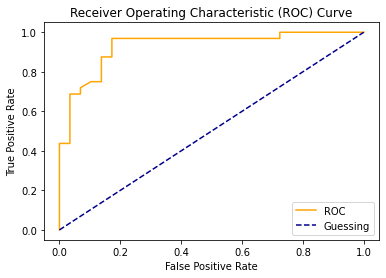

In [48]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.9304956896551724

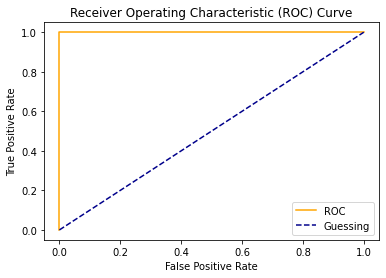

In [50]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [51]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

In [52]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [53]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8654448653350507

In [54]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [55]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df.head(7)

,actual values,predictions
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
76,20.0,21.644
316,17.8,19.113


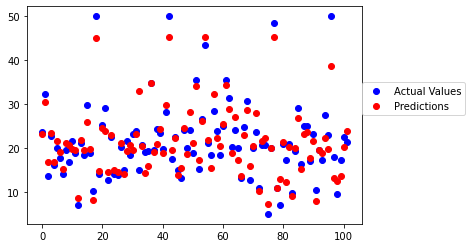

In [56]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Actual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [57]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442